In [32]:
import sys
sys.path.append('../../') # or just install the module
sys.path.append('../../../flaming-choripan') # or just install the module
sys.path.append('../../../astro-lightcurves-handler') # or just install the module

In [33]:
%load_ext autoreload
%autoreload 2
from synthsne.generators.bounds import get_pm_bounds
from lchandler.lc_classes import SubLCO
import numpy as np

days = np.linspace(0, 65, 100)
print(days)
obs = days*0+1
obse = obs*0
lcobjb = SubLCO(days, obs, obse)
bounds = get_pm_bounds(lcobjb, ['x'],
    uses_new_bounds=True,
)['x']
parameters = [k for k in bounds.keys() if not k=='t0']
bounds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[ 0.          0.65656566  1.31313131  1.96969697  2.62626263  3.28282828
  3.93939394  4.5959596   5.25252525  5.90909091  6.56565657  7.22222222
  7.87878788  8.53535354  9.19191919  9.84848485 10.50505051 11.16161616
 11.81818182 12.47474747 13.13131313 13.78787879 14.44444444 15.1010101
 15.75757576 16.41414141 17.07070707 17.72727273 18.38383838 19.04040404
 19.6969697  20.35353535 21.01010101 21.66666667 22.32323232 22.97979798
 23.63636364 24.29292929 24.94949495 25.60606061 26.26262626 26.91919192
 27.57575758 28.23232323 28.88888889 29.54545455 30.2020202  30.85858586
 31.51515152 32.17171717 32.82828283 33.48484848 34.14141414 34.7979798
 35.45454545 36.11111111 36.76767677 37.42424242 38.08080808 38.73737374
 39.39393939 40.05050505 40.70707071 41.36363636 42.02020202 42.67676768
 43.33333333 43.98989899 44.64646465 45.3030303  45.95959596 46.61616162
 47.27272727 47.92929293 48.58585859 4

../../../astro-lightcurves-handler/lchandler/lc_classes.py:326: RuntimeWarning: divide by zero encountered in true_divide
  snr = (self.obs**2)/(self.obse**2)


{'A': (0.2, 5.0),
 't0': (-100.0, 100.0),
 'gamma': (10, 120),
 'f': (0, 0.85),
 'trise': (5, 50),
 'tfall': (10, 130)}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'ti': -11.25, 'tmax': 21.588687500000027, 'tf': 50.4459211858686} (-11.25, 21.588687500000027) (21.588687500000027, 67.0)


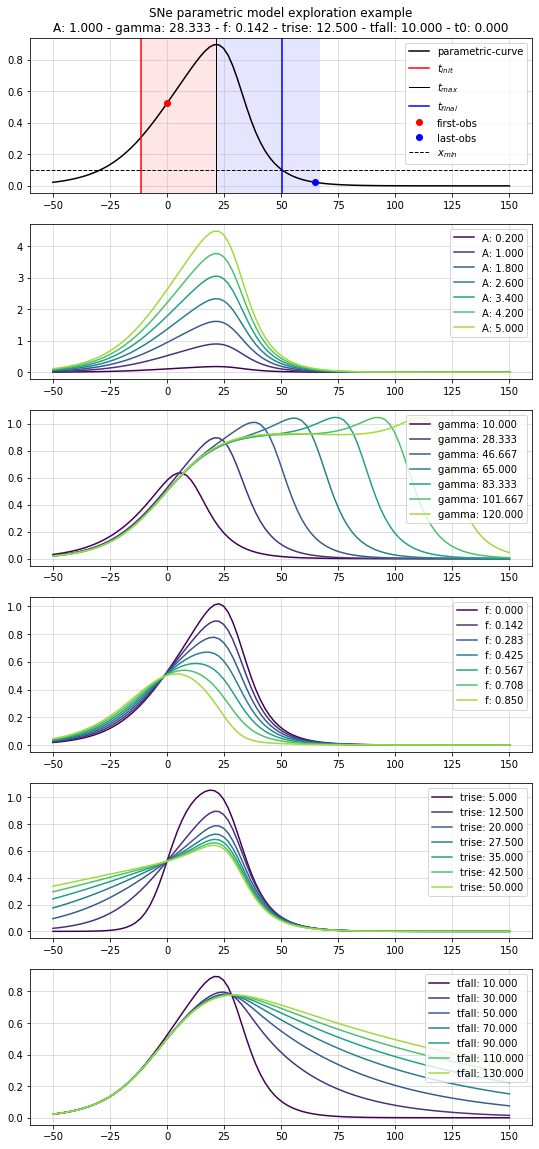

In [34]:
%load_ext autoreload
%autoreload 2
from synthsne.generators.sne_models import SNeModel
import matplotlib.pyplot as plt
from matplotlib import cm

def get_fixed(p, bounds):
    if p=='tfall':
        return 10
    return bounds[p][0]+(bounds[p][-1]-bounds[p][0])/6
def get_linspace(p, bounds, n):
    return list(np.linspace(bounds[p][0], bounds[p][-1], n))

n = 7
viridis = cm.get_cmap('viridis')
figsize = (9,20)
fig, axs = plt.subplots(len(parameters)+1, 1, figsize=figsize)


plot_days = np.linspace(-50, 150, 100)
### ax[0]
ax = axs[0]
pm_args = {p:get_fixed(p, bounds) for p in parameters}
pm_args['t0'] = 0
sne = SNeModel(lcobjb, pm_args)
ax.plot(plot_days, sne.evaluate(plot_days), c='k', label='parametric-curve')

### plot time window
min_obs_threshold = pm_args['A']/10
pm_times, ti_search_range, tf_search_range = sne.get_pm_times(min_obs_threshold)
print(pm_times, ti_search_range, tf_search_range)
ax.axvspan(*ti_search_range, alpha=0.1, color='r', linewidth=0)
ax.axvspan(*tf_search_range, alpha=0.1, color='b', linewidth=0)
ax.axvline(pm_times['ti'], color='r', label='$t_{init}$')
ax.axvline(pm_times['tmax'], color='k', lw=1, label='$t_{max}$')
ax.axvline(pm_times['tf'], color='b', label='$t_{final}$')
ax.plot(lcobjb.days[0], sne.evaluate(lcobjb.days[0]), 'o', c='r', label='first-obs') # first day
ax.plot(lcobjb.days[-1], sne.evaluate(lcobjb.days[-1]), 'o', c='b', label='last-obs') # last day
ax.axhline(min_obs_threshold, color='k', lw=1, label='$x_{min}$', linestyle='--')

ax.legend(loc='upper right')
ax.grid(alpha=0.5)
title = 'SNe parametric model exploration example\n'
title += ' - '.join([f'{k}: {pm_args[k]:,.3f}' for k in pm_args.keys()])
ax.set_title(title)
    
for kp,var_p in enumerate(parameters):
    ax = axs[kp+1]
    pm_args = {p:get_fixed(p, bounds) for p in parameters}
    pm_args['t0'] = 0
    for kp2,var_p2 in enumerate(get_linspace(var_p, bounds, n)):
        pm_args[var_p] = var_p2
        sne = SNeModel(lcobjb, pm_args)
        label = f'{var_p}: {var_p2:,.3f}'
        ax.plot(plot_days, sne.evaluate(plot_days), c=viridis(kp2/n), label=label)
    
    ax.legend(loc='upper right')
    ax.grid(alpha=0.5)
    
plt.show()